In [4]:
import numpy as np
import matplotlib.pyplot as plt
import magprime.utility as ut

import wavelets
from wavelets import WaveletAnalysis
import importlib


In [2]:
B = ut.load_swarm_data()

c:\Users\aphoffm2\AppData\Local\anaconda3\Lib\site-packages\magprime\utility\data_loader.py:28: DtypeWarning: Columns (2,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path, sep=',',header=None)


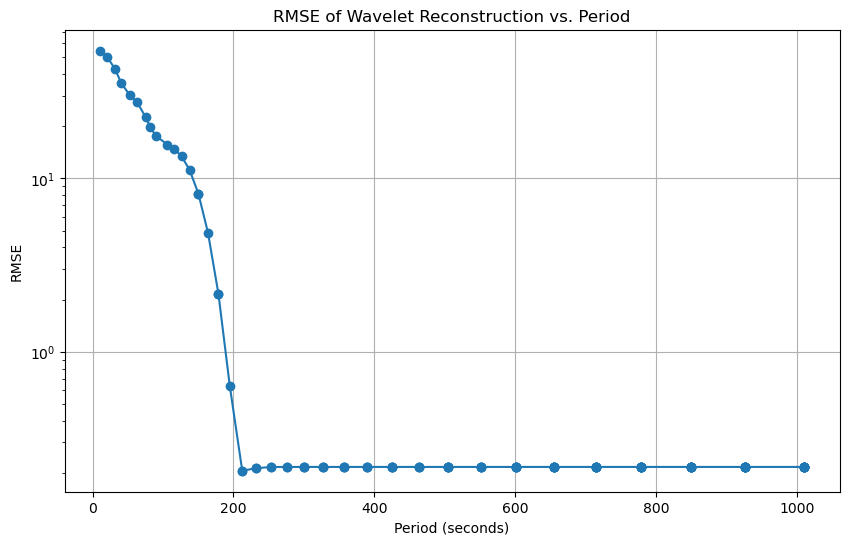

In [21]:
importlib.reload(wavelets)

rmse_values = []
actual_periods = []
for factor in np.linspace(.1, 10,100):
    w1 = WaveletAnalysis(B[2], dt=1/50, frequency=True, dj = 1/8, unbias=False, mask_coi = True)
    w1.lowest_freq = 1/(100*factor)
    cwt = w1.wavelet_transform
    B_n = w1.reconstruction()
    rmse = np.sqrt(np.mean((B[2] - B_n) ** 2))
    rmse_values.append(rmse)
    actual_periods.append(w1.fourier_periods[-1])


plt.figure(figsize=(10, 6))
plt.plot(actual_periods, rmse_values, marker='o', linestyle='-')
plt.xlabel('Period (seconds)')
plt.ylabel('RMSE')
plt.yscale('log')
plt.title('RMSE of Wavelet Reconstruction vs. Period')
plt.grid(True)
plt.show()

In [23]:
print(actual_periods[np.argmin(rmse_values)])
print(np.linspace(.1, 10,100)[np.argmin(rmse_values)])

212.47419263402142
2.0


In [10]:
w1 = WaveletAnalysis(B[2], dt=1/50, frequency=True, dj = 1/8, unbias=False, mask_coi = True)
w1.lowest_freq = None
cwt = w1.wavelet_transform
B_n = w1.reconstruction()
rmse = np.sqrt(np.mean((B[2] - B_n) ** 2))
print(rmse)
print(w1.fourier_periods[-1])

16.41831320160655
97.41984686102292
